# Random Forest

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns

In [11]:
df = pd.read_csv(r'C:\Users\91735\Downloads\breast_cancer.csv')

In [12]:
df.describe()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnose
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [3]:
x = df.drop('diagnose',axis = 1)
y = df['diagnose']

In [4]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state=0)

In [18]:
model = RandomForestClassifier(random_state = 1,n_estimators = 2000)

In [19]:
model.fit(x,y)

RandomForestClassifier(n_estimators=2000, random_state=1)

In [21]:
I = model.feature_importances_

In [22]:
I

array([0.04786191, 0.27018697, 0.22232477, 0.02821389, 0.08151435,
       0.16604124, 0.10599434, 0.07083451, 0.00702803])

In [6]:
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

1.0

In [7]:
model.score(xtest,ytest)

0.9512195121951219

In [8]:
ypred = model.predict(xtest)

In [28]:
cm = confusion_matrix(ypred,ytest)
cm

array([[126,   6],
       [  4,  69]], dtype=int64)

<AxesSubplot:>

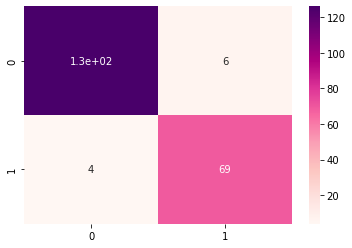

In [31]:
sns.heatmap(cm, annot = True,  cmap = 'RdPu')

In [10]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       132
           1       0.92      0.95      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

